# [Isospaced linear ion strings](https://doi.org/10.1007/s00340-016-6340-0)
Michael Johanning, Appl. Phys. B (2016) 122:71

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ion_sim import IonSim, init
from pint import UnitRegistry
from math import pi as π

u = UnitRegistry()
u.setup_matplotlib()

In [2]:
from autograd.scipy.special import polygamma as ψ
from scipy.special import zeta as ζ


m = u('40 amu')
q = u('elementary_charge')
ε_0 = u.ε_0

ω = 2*π * u('10 MHz')
ωz = 2*π * u('100 kHz')
d = u('5 um')
Enn = q**2/(4*π*ε_0) * 1/d**2

class IsoExample(IonSim):
    def U(self, x, y, z, t):
        m = self.m
        N = len(m)
        N_plus = (N+1)/2
        D = d.to_base_units().m
        φ_N0 = 2*Enn*d * ψ(0, N_plus)
        φ_N = φ_N0 - Enn*d*(ψ(0, N_plus+z/D) + ψ(0, N_plus-z/D))
        Ux = (1/2) * np.sum(m) * ω**2 * x**2
        Uy = (1/2) * np.sum(m) * ω**2 * y**2
        Uz = φ_N
        U = Ux.to_base_units().m + Uy.to_base_units().m + Uz.to_base_units().m
        return U

## Fig 2
Electrostatic potentials to generate equally spaced strings of
an uneven number of ions from 1 (orange) to 31 (red) ions and 
next-neighbor separation d.
The notion of constant spacing starts to be
meaningful for symmetric potentials and string lengths above three;
the formal potential solutions for smaller N exist and are included
for completeness. The ion positions with their energy in the external
potential are indicated by the *dots*
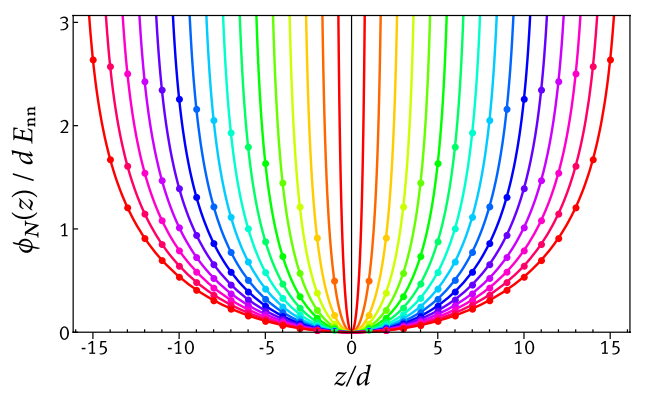

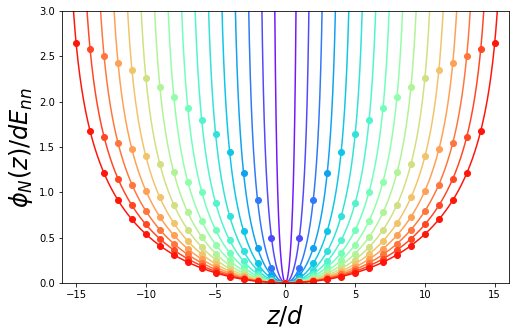

In [3]:
def plot_figure_2():
    ex = IsoExample(u)
    plt.figure(figsize=(8,5))
    for N in range(1, 31+1, 2):
        c = matplotlib.cm.rainbow(N/32)[:3]
        ex.m = m * np.ones(N)
        z = (np.linspace(-(N+1)/2, (N+1)/2, 1000) * d).to_base_units()
        ions = np.linspace(-(N-1)/2, (N-1)/2, N)
        plt.plot((z/d).to_base_units().m, (ex.U(0, 0, z.m, 0) / (d*Enn).to_base_units()).m, color=c)
        plt.plot(ions, (ex.U(0, 0, ions * d.to_base_units().m, 0) / (d*Enn).to_base_units()).m, 'o', color=c)
    plt.ylim(0,3)
    plt.xlim(-16,16)
    plt.xlabel(r'$z/d$', fontsize=24)
    plt.ylabel(r'$\phi_N(z)/d E_{nn}$', fontsize=24)
plot_figure_2()

## Fig 3
Anharmonic potential according to
$$
\phi_N(z) = \phi_{N,0} - E_{nn} d \left[ \psi^{(0)}(\tilde{z}_+) + \psi^{(0)}(\tilde{z}_-)\right]
$$
as a function of
z/N d. For N > 16 the traces become almost indistinguishable
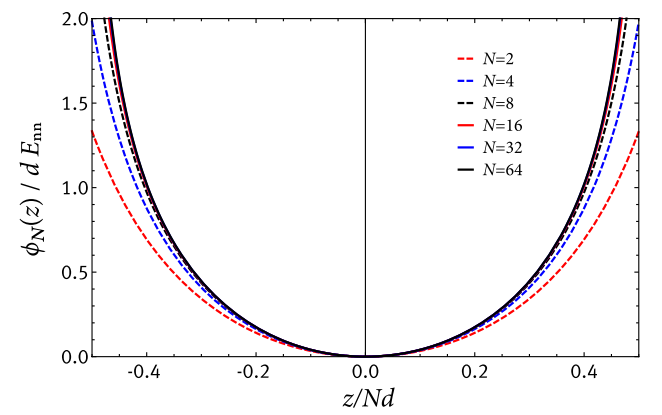

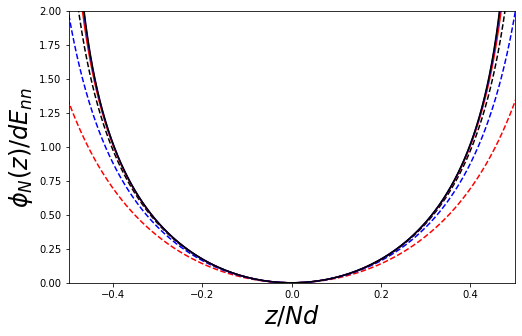

In [4]:
def plot_figure_3():
    ex = IsoExample(u)
    fmt = {2: 'r--', 4: 'b--', 8: 'k--', 16: 'r-', 32: 'b-', 64: 'k-'}
    plt.figure(figsize=(8,5))
    for N in [2, 4, 8, 16, 32, 64]:
        ex.m = m * np.ones(N)
        z = (np.linspace(-(N+1)/2, (N+1)/2, 1000) * d).to_base_units()
        plt.plot((z/(N*d)).to_base_units().m, (ex.U(0, 0, z.m, 0) / (d*Enn).to_base_units()).m, fmt[N])
    plt.ylim(0,2)
    plt.xlim(-0.5,0.5)
    plt.xlabel(r'$z/Nd$', fontsize=24)
    plt.ylabel(r'$\phi_N(z)/d E_{nn}$', fontsize=24)
plot_figure_3()

## Fig 4
Numerically obtained equilibrium positions of ions loaded
into a harmonic potential (left) and an anharmonic potential according to 
$$
\phi_N(z) = \phi_{N,0} - E_{nn} d \left[ \psi^{(0)}(\tilde{z}_+) + \psi^{(0)}(\tilde{z}_-)\right]
$$
(right) for strings of length N (vertical axis): The
simulations were carried out for 172Yb+ and a trap frequency of
ωz = 2π × 100 kHz for the harmonic trap. The anharmonic trapping
potential was optimized to yield a homogeneous spacing of d = 5 µm
for N = 20 ions (marked in gray and with arrows). The most obvious
features of the ion strings in the anharmonic potential are the absence
of increased ion spacings toward the string’s ends and the almost constant string length for large ion numbers
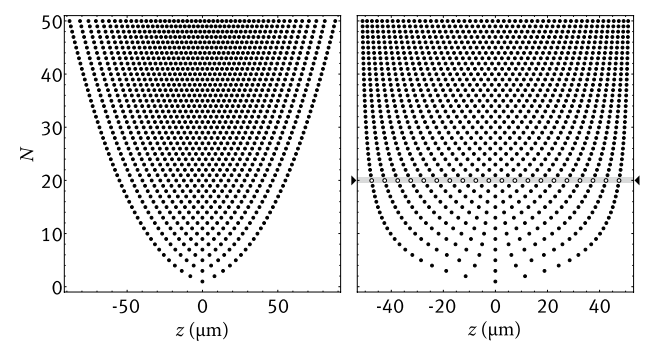

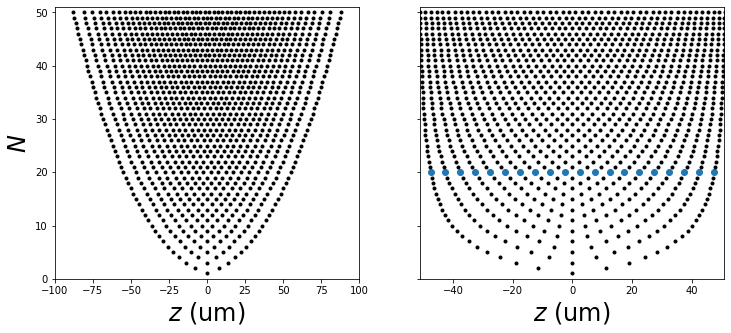

In [5]:
def plot_figure_4():
    m = u('172 amu')
    ω = 2*π * u('10 MHz')
    ωz = 2*π * u('100 kHz')
    d = u('5 um')
    
    class HarmonicExample(IonSim):
        def U(self, x, y, z, t):
            Ux = (1/2) * m * ω**2 * x**2
            Uy = (1/2) * m * ω**2 * y**2
            Uz = (1/2) * m * ωz**2 * z**2
            U = Ux.to_base_units().m + Uy.to_base_units().m + Uz.to_base_units().m
            return U
        
    class Iso20Example(IonSim):
        def U(self, x, y, z, t):
            N = 20
            N_plus = (N+1)/2
            D = d.to_base_units().m
            φ_N0 = 2*Enn*d * ψ(0, N_plus)
            φ_N = φ_N0 - Enn*d*(ψ(0, N_plus+z/D) + ψ(0, N_plus-z/D))
            Ux = (1/2) * m * ω**2 * x**2
            Uy = (1/2) * m * ω**2 * y**2
            Uz = φ_N
            U = Ux.to_base_units().m + Uy.to_base_units().m + Uz.to_base_units().m
            return U

    
    harmonic = HarmonicExample(u)
    iso = Iso20Example(u)
    d = u('5 um')
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
    for N in range(1, 50+1):
        x0 = np.zeros((3, N)) * u('um')
        x0[2,:] = np.linspace(-50, 50, N) * u('um')

        harmonic.m = m * np.ones(N)
        harmonic.x0 = x0
        pos = harmonic.equilibrium_position()
        ax1.plot(pos[2].to('um'), N*np.ones(N), 'k.')
        
        iso.m = m * np.ones(N)
        iso.x0 = x0
        pos = iso.equilibrium_position()
        fmt = 'o' if N==20 else 'k.' 
        ax2.plot(pos[2].to('um'), N*np.ones(N), fmt)
        
    ax1.set_ylim(0,51)
    ax1.set_xlim(-100,100)
    ax1.set_xlabel(r'$z$ (um)', fontsize=24)
    ax1.set_ylabel(r'$N$', fontsize=24)
    
    ax2.set_ylim(0,51)
    ax2.set_xlim(-51,51)
    ax2.set_xlabel(r'$z$ (um)', fontsize=24)
plot_figure_4()

## Fig 7
Motional eigenstates of a chain of N = 30 ions. **a** Lowest
eigenstate δ1 and highest eigenstate δ30: Both states have a sinusoidal
envelope. The highest eigenstate differs from the lowest by an alternating excursion of neighboring ions. Excursions have been plotted in
the transverse direction for visual clarity; **b** color plot of all motional
eigenstates. *Each mode* is represented by one row, and *each column*
represents one ion. Excursions of the normalized eigenstates are
color-coded (compare color legend on the *right side*). The arbitrary
phase of each eigenstate was chosen such that the excursion of the
first ion is positive. The modes resemble the vibrational modes of a
string
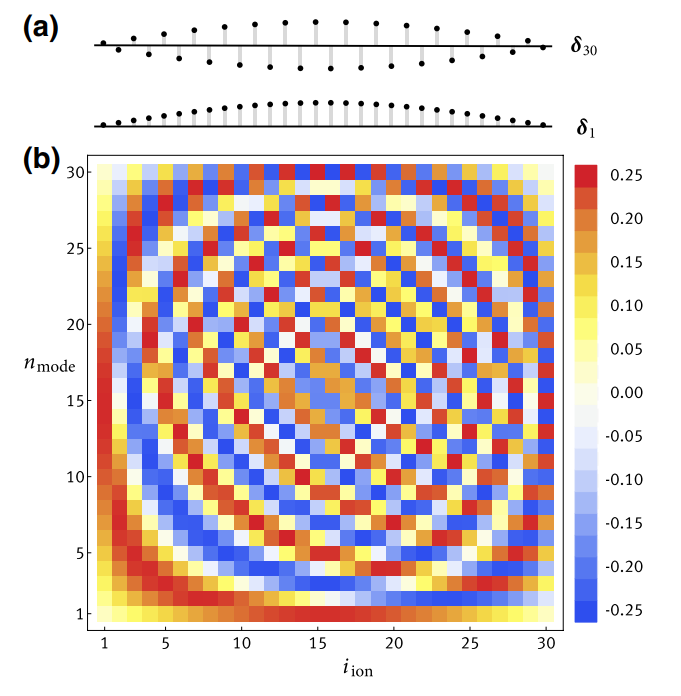

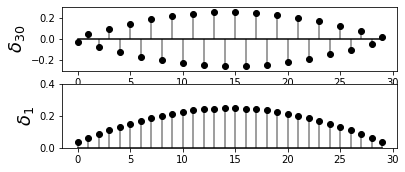

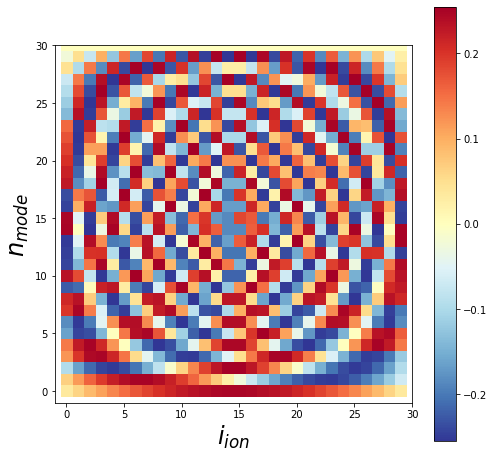

In [6]:
def plot_figure_7():
    iso = IsoExample(u)
    iso.m = u('40 amu') * np.ones(30)
    iso.x0 = init.string(iso, dim=2, dx=u('5 um'))
    _, δ = iso.normal_modes()

    plt.figure()
    plt.subplot(3,1,1)
    plt.stem(δ[2,:,30-1], basefmt='k', linefmt='gray', markerfmt='ko')
    plt.ylim(-0.3,0.3)
    plt.ylabel(r'$δ_{30}$', fontsize=18)
    plt.subplot(3,1,2)
    plt.stem(δ[2,:,0], basefmt='k', linefmt='gray', markerfmt='ko')
    plt.ylim(0,0.4)
    plt.ylabel(r'$δ_{1}$', fontsize=18)
    plt.figure(figsize=(8,8))
    plt.imshow(δ[2,:,:31].T, cmap=matplotlib.cm.RdYlBu_r)
    plt.colorbar()
    plt.xlim(-1,30)
    plt.ylim(-1,30)
    plt.xlabel(r'$i_{ion}$', fontsize=24)
    plt.ylabel(r'$n_{mode}$', fontsize=24)
plot_figure_7()

## Fig 8
Axial normal mode frequencies of an equidistant ion string.
The *eigenfrequencies* are displayed as *dots* as a function of the ion
number N. The asymptotic maximum eigenfrequency is plotted as a
*gray line*. The eigenfrequencies fill a band which approaches a constant width for large N. The mode density peaks at the *upper band
edge*. The frequency of lowest mode is roughly inversely proportional
to the string length
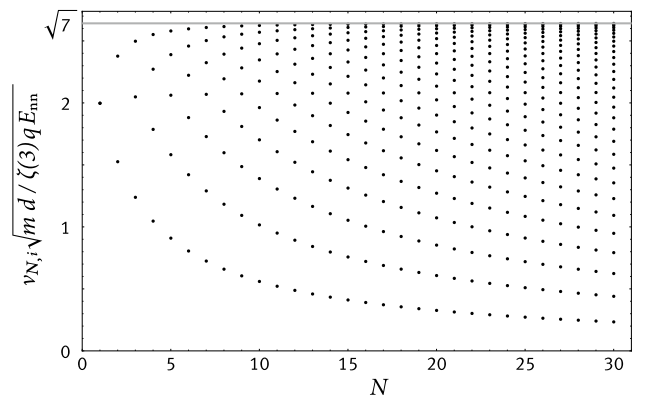

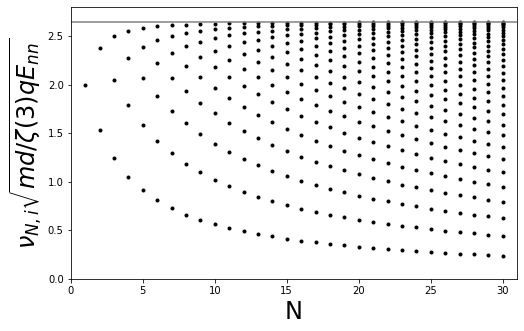

In [7]:
def plot_figure_8():
    iso = IsoExample(u)
    plt.figure(figsize=(8,5))
    for N in range(1,30+1):
        iso.m = u('40 amu') * np.ones(N)
        iso.x0 = init.string(iso, dim=2, dx=u('5 um'))
        ν, _ = iso.normal_modes()

        plt.plot(N*np.ones(N), 2*π*(ν[:N] * (m*d/(ζ(3)*Enn))**(1/2)).to_base_units(), 'k.')
    plt.xlim(0,31)
    plt.ylim(0,2.8)
    plt.plot(plt.xlim(), np.ones(2)*np.sqrt(7), color='gray')
    plt.xlabel('N', fontsize=24)
    plt.ylabel(r'$\nu_{N,i} \sqrt{m d / \zeta(3) q E_{nn}}$', fontsize=24)
plot_figure_8()

## Fig 10
Eigenstates of 30 ions in a harmonic trap. The representation is identical to Fig. 7. For the center of mass mode, all ions oscillate with uniform amplitude. With increasing mode frequency, fewer
and fewer ions participate in the mode, building a bulk of shrinking
size, where the ions close to the outer edges of the bulk oscillate the
strongest
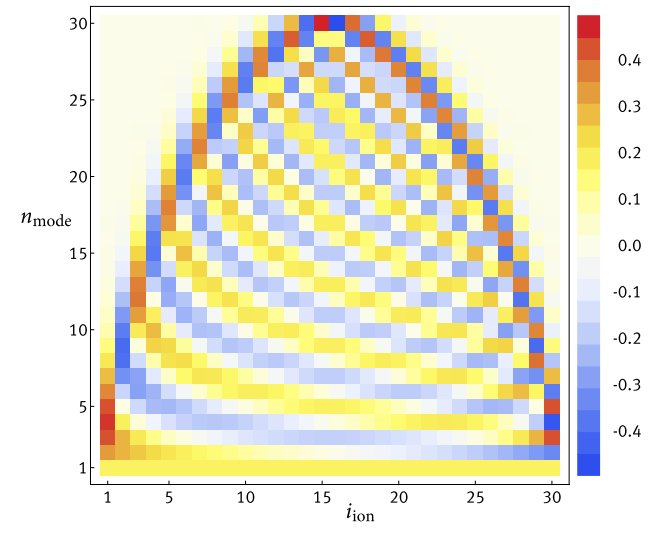

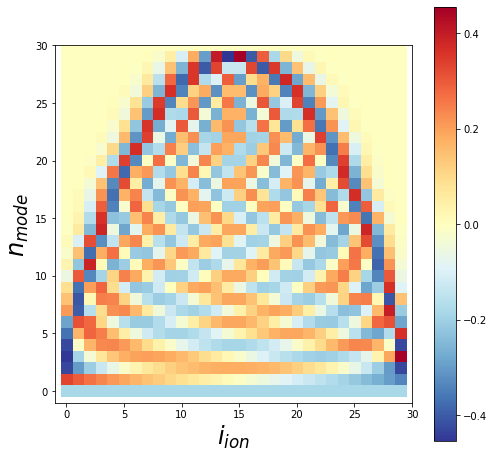

In [8]:
def plot_figure_10():
    class HarmonicExample(IonSim):
        def U(self, x, y, z, t):
            Ux = (1/2) * m * ω**2 * x**2
            Uy = (1/2) * m * ω**2 * y**2
            Uz = (1/2) * m * ωz**2 * z**2
            U = Ux.to_base_units().m + Uy.to_base_units().m + Uz.to_base_units().m
            return U
    
    harmonic = HarmonicExample(u)
    harmonic.m = u('40 amu') * np.ones(30)
    harmonic.x0 = init.string(harmonic, dim=2, dx=u('5 um'))
    _, δ = harmonic.normal_modes()

    plt.figure(figsize=(8,8))
    plt.imshow(δ[2,:,:31].T, cmap=matplotlib.cm.RdYlBu_r)
    plt.colorbar()
    plt.xlim(-1,30)
    plt.ylim(-1,30)
    plt.xlabel(r'$i_{ion}$', fontsize=24)
    plt.ylabel(r'$n_{mode}$', fontsize=24)
plot_figure_10()